##### algom/playbooks
# predict

#### Pull a pickle from GCS and use it to predict a set of data.



<br>

#### Steps
+ ...



In [1]:
import sys
sys.path.append('/home/jovyan/algom-trading/src')
from model import model_mgmt as mm
from model import model_regression as reg


<br>

## Run a prediction process

Supply the following parameters to run a prediction process. These processes can also be added to a workflow. 
+ `model_execution_id`: ID for a saved model
+ `outcome`: the outcome variable
+ `file`: filepath for the SQL file that produces the input data
+ `attributes`: dictionary of parameters found in the SQL file
+ `df`: alternatively, a dataframe can be passed; however,the fields must match the training data
+ `to_bq`: whether to load results to BigQuery; defaults to false


In [4]:
model = reg.run_predict_process(
    model_execution_id='ca23d81e8faa15509a64742a6b7477bc3deffa34',
    outcome='ROR_n10',
    file = "../../data/queries/BTC/BTC_features_n10.sql",
    attributes={'partition': "20191111"},
    to_bq=True
)


Writing query to a dataframe.
Loaded query to dataframe in 0:00:16.642988.
The following paths have been added to self.storage:
            - model_storage_filepath: models/20191111_GradientBoostingRegressor_BTC-USD_ca23d81e8faa15509a64742a6b7477bc3deffa34.pickle
            - model_filename:	20191111_GradientBoostingRegressor_BTC-USD_ca23d81e8faa15509a64742a6b7477bc3deffa34.pickle
            - model_storage_id:	20191111_GradientBoostingRegressor_BTC-USD_ca23d81e8faa15509a64742a6b7477bc3deffa34
            - model_execution_id:	ca23d81e8faa15509a64742a6b7477bc3deffa34
            
Downloaded file from GCS to:  /home/jovyan/algom-trading/models/20191111_GradientBoostingRegressor_BTC-USD_ca23d81e8faa15509a64742a6b7477bc3deffa34.pickle
Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Set predictions to self.predict in 0:00:00.024483.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mea

In [5]:
model.metadata.model_execution_id


'ca23d81e8faa15509a64742a6b7477bc3deffa34'

In [6]:
model.predictions.tail()

,model_execution_id,model_data_id,model_execution_datetime,model_outcome,model_execution_type,as_of_date,date,ticker,week,month,quarter,year,day_of_week,day_of_year,predictions,outcomes,errors
1545,ca23d81e8faa15509a64742a6b7477bc3deffa34,364afdbad5a5c8f9940f606a53ec1d97a94b0c30,2019-12-04 22:44:04.592414,ROR_n10,predict,2019-11-11,2019-10-05 00:00:00+00:00,BTC-USD,40,10,4,2019,5,278,0.009163,-0.007405,-0.016568
1546,ca23d81e8faa15509a64742a6b7477bc3deffa34,364afdbad5a5c8f9940f606a53ec1d97a94b0c30,2019-12-04 22:44:04.592414,ROR_n10,predict,2019-11-11,2019-10-06 00:00:00+00:00,BTC-USD,40,10,4,2019,6,279,0.019755,0.017336,-0.002420
1547,ca23d81e8faa15509a64742a6b7477bc3deffa34,364afdbad5a5c8f9940f606a53ec1d97a94b0c30,2019-12-04 22:44:04.592414,ROR_n10,predict,2019-11-11,2019-10-07 00:00:00+00:00,BTC-USD,41,10,4,2019,0,280,0.028194,0.031551,0.003357
1548,ca23d81e8faa15509a64742a6b7477bc3deffa34,364afdbad5a5c8f9940f606a53ec1d97a94b0c30,2019-12-04 22:44:04.592414,ROR_n10,predict,2019-11-11,2019-10-08 00:00:00+00:00,BTC-USD,41,10,4,2019,1,281,0.066853,0.073256,0.006403
1549,ca23d81e8faa15509a64742a6b7477bc3deffa34,364afdbad5a5c8f9940f606a53ec1d97a94b0c30,2019-12-04 22:44:04.592414,ROR_n10,predict,2019-11-11,2019-10-09 00:00:00+00:00,BTC-USD,41,10,4,2019,2,282,0.051153,0.043365,-0.007788


<br>

### View model performance

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`
        


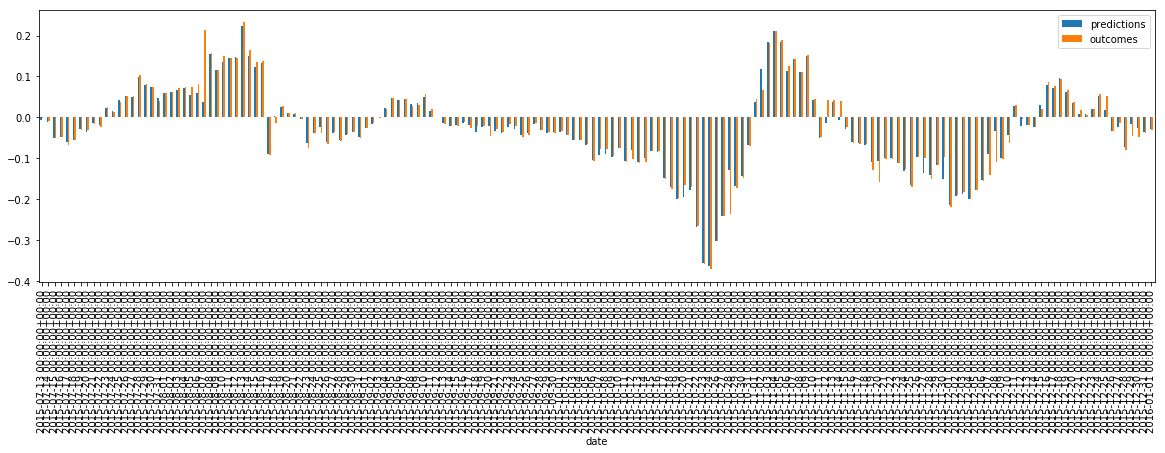

In [9]:
%matplotlib inline
model.plot_predictions_by_date(start_date='2015-01-01', end_date='2016-01-01')


<br>

### Load model data to BigQuery

In [10]:
model.load_to_bq()

Loaded dataframe to BigQuery in 0:00:11.586612:	algomosaic-nyc:yahoo_model_metadata.model_queries_20191111
Loaded query to BigQuery in algomosaic-nyc.yahoo_model_metadata.model_queries_20191111.
Dataset has been deduplicated: 	algomosaic-nyc.yahoo_model_metadata.model_queries_20191111
Loaded dataframe to BigQuery in 0:00:07.937654:	algomosaic-nyc:yahoo_model_predictions.model_prediction_20191111
Loaded query to BigQuery in algomosaic-nyc.yahoo_model_predictions.model_prediction_20191111.
Dataset has been deduplicated: 	algomosaic-nyc.yahoo_model_predictions.model_prediction_20191111
yahoo_model_predictions.model_evaluation_YYYYMMDD does not exist. Skipping.
Loaded dataframe to BigQuery in 0:00:07.983641:	algomosaic-nyc:yahoo_model_performance.model_performance_20191111
Loaded query to BigQuery in algomosaic-nyc.yahoo_model_performance.model_performance_20191111.
Dataset has been deduplicated: 	algomosaic-nyc.yahoo_model_performance.model_performance_20191111
Loaded dataframe to BigQuer

<br>

## Resources
+ [Google BigQuery](https://console.cloud.google.com/bigquery?project=algomosaic-nyc&p=algomosaic-nyc&page=project)
+ [Google Storage](https://console.cloud.google.com/storage/browser/algom-trading?project=algomosaic-nyc)
+ [Google Drive](https://drive.google.com/drive/folders/1ou6vEWHHeVI0IIjdvj-zGYrCQ7KHRYRm)
+ [Trade Journal: Watchlist](https://docs.google.com/spreadsheets/d/1KXl8GxHlveYT5d3UifVwz-5-oxMyikgSfoZ1evIobmc/edit#gid=1679258225)
